In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import log10

In [4]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.figsize'] = (8, 5)

# Bruteforce

In [22]:
df = pd.read_csv("bruteforce/bruteforce.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:5].median(), axis=1)

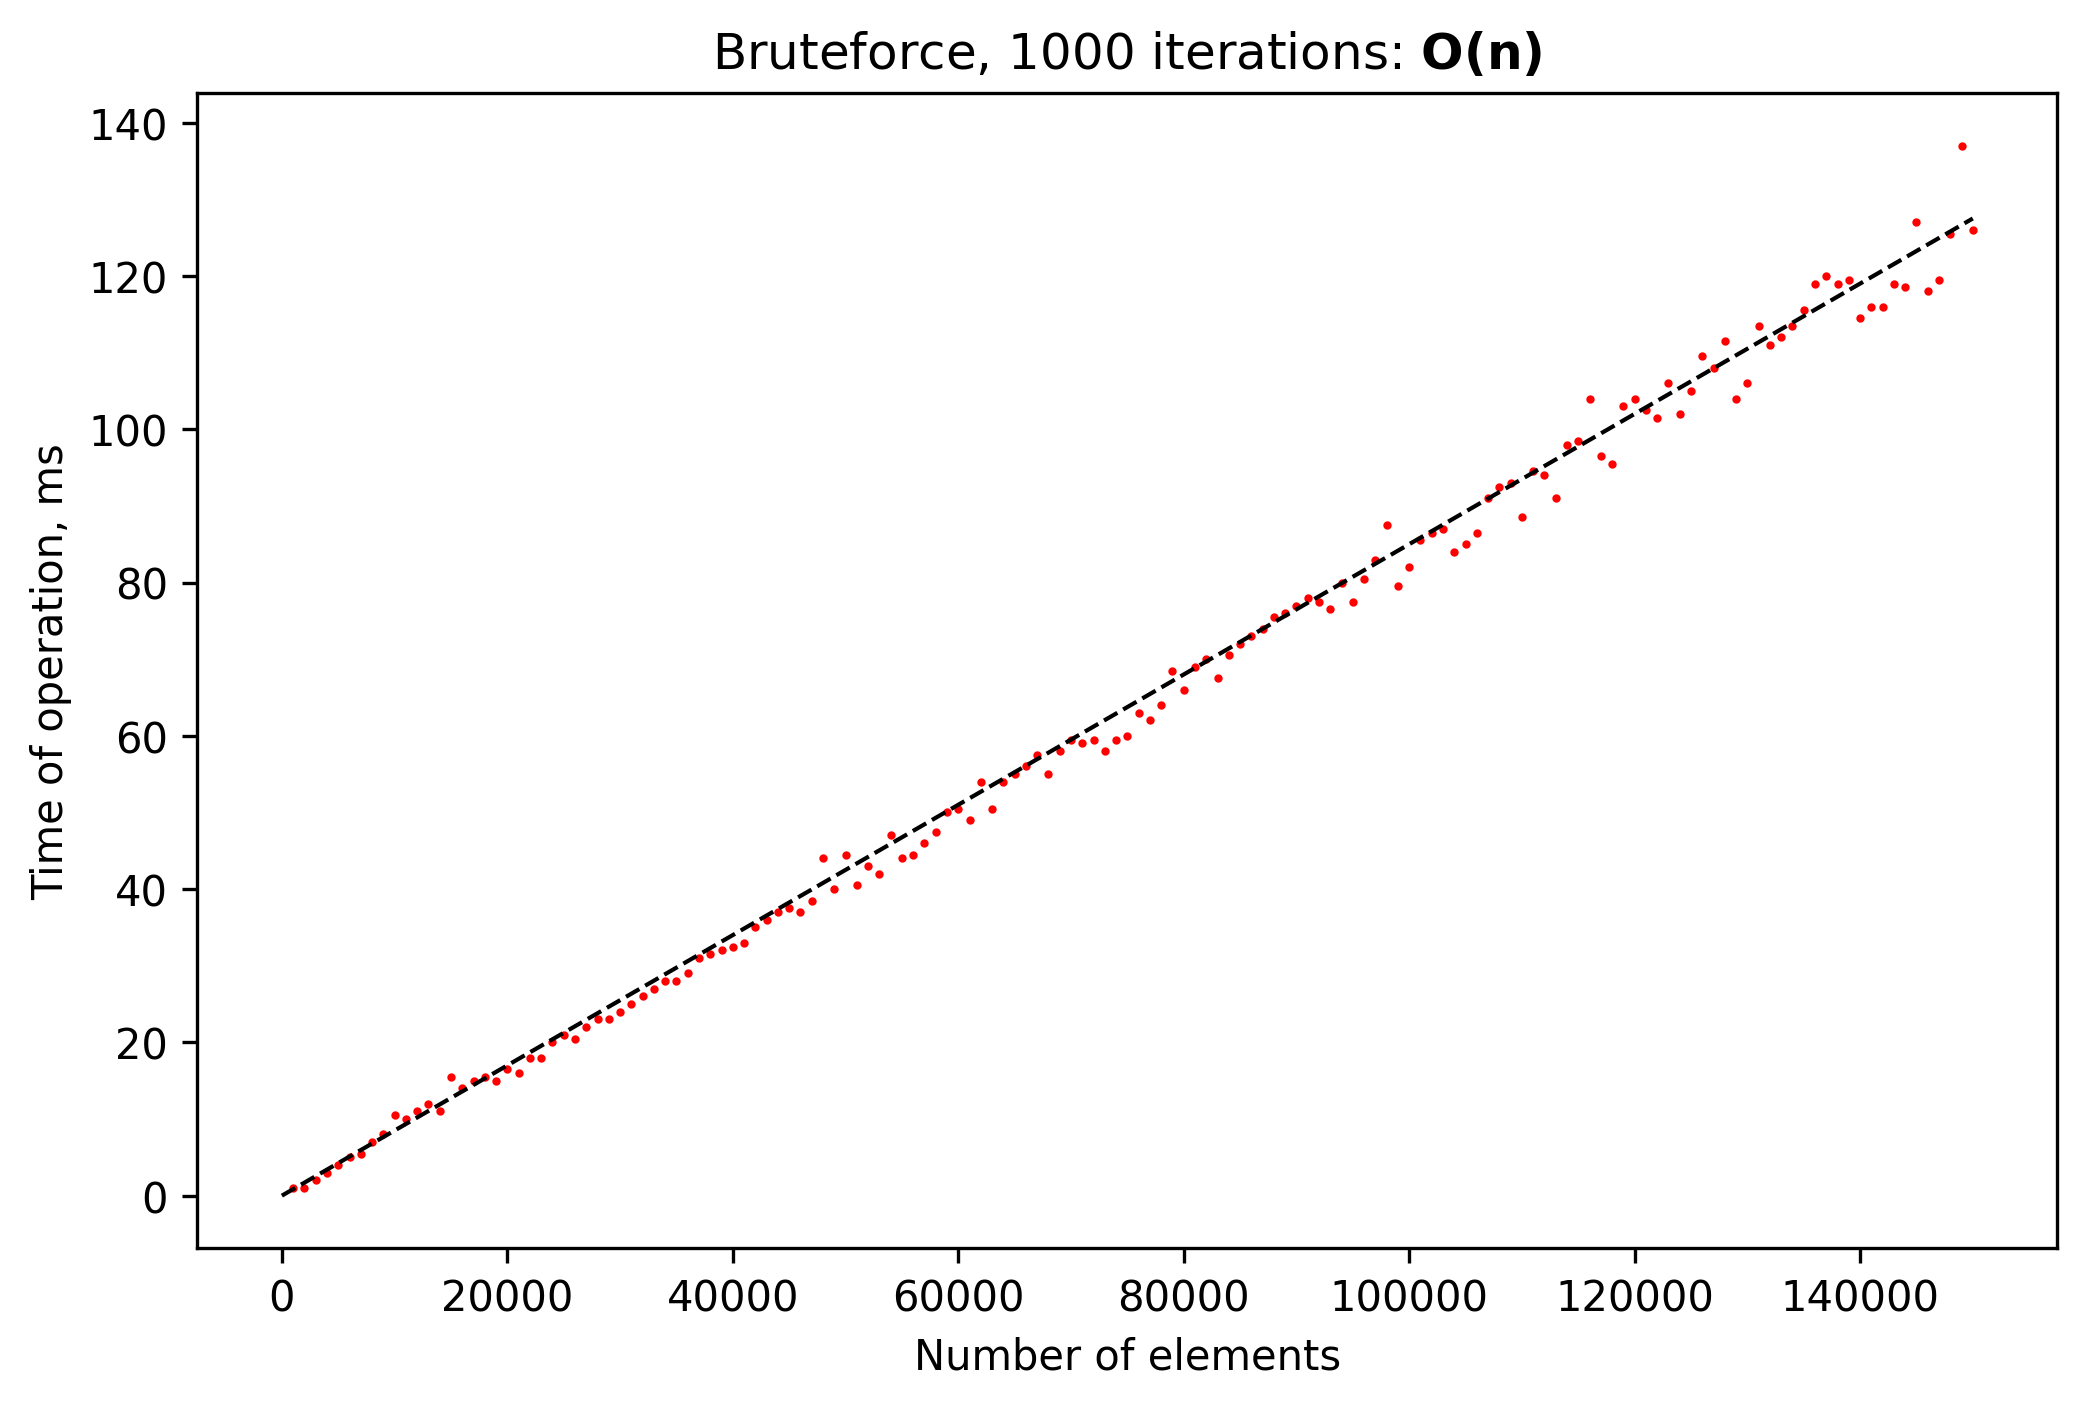

In [23]:

ls = np.linspace(0, 150000, 100)
plt.xlabel(r'Number of elements')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['size'], df['time'], 'or', ms=1)
plt.title('Bruteforce, 1000 iterations: $\mathbf{O(n)}$')
k=85e-5
plt.plot(ls, k*ls, '--k', lw=1)

# Binary search

In [45]:
df = pd.read_csv("bisearch/bisearch.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:100].median(), axis=1)
df

,size,time1,time2,time3,time4,time5,time6,time7,time8,time9,...,time92,time93,time94,time95,time96,time97,time98,time99,time100,time
0,1,1109,1108,1111,1115,1106,1096,1106,1085,1060,...,1064,1105,1053,1050,1055,1053,1064,1056,1054,1221.0
1,2,2421,2252,2292,2315,2240,2362,2292,2453,2252,...,2304,2294,2465,2372,2307,2245,2209,2269,2312,2319.0
2,3,2306,2263,2381,2237,2284,2253,2370,2282,2313,...,2242,2361,2258,2223,2310,2227,2237,2139,2300,2290.0
3,4,2973,2969,3047,2888,2976,2853,2984,3085,2966,...,2925,3119,3121,3218,2887,3037,2985,2943,3026,3001.0
4,5,2954,2881,2974,2883,3077,3005,2920,3146,3129,...,3755,3756,3594,3308,3099,2924,2961,2990,2967,3562.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,454823,23886,24199,23891,24151,24244,23944,20755,20697,23919,...,20309,20676,24935,20829,20685,25094,25379,21447,25856,23886.0
65,545788,24034,26822,21957,23168,26377,27192,25998,21674,25730,...,25486,24951,24885,25136,25037,25041,25205,34623,21301,25067.0
66,654946,22038,26616,26907,27171,23026,25429,21724,25944,26617,...,27373,27333,27646,21722,21314,21325,24543,24890,27774,25295.0
67,785936,27674,27429,28132,26248,27633,27495,28350,28632,29201,...,25956,25352,25275,22184,27206,27618,28276,25000,24032,25854.0


In [46]:
df['lnsize'] = df.apply(lambda x: log10(x['size']), axis=1)

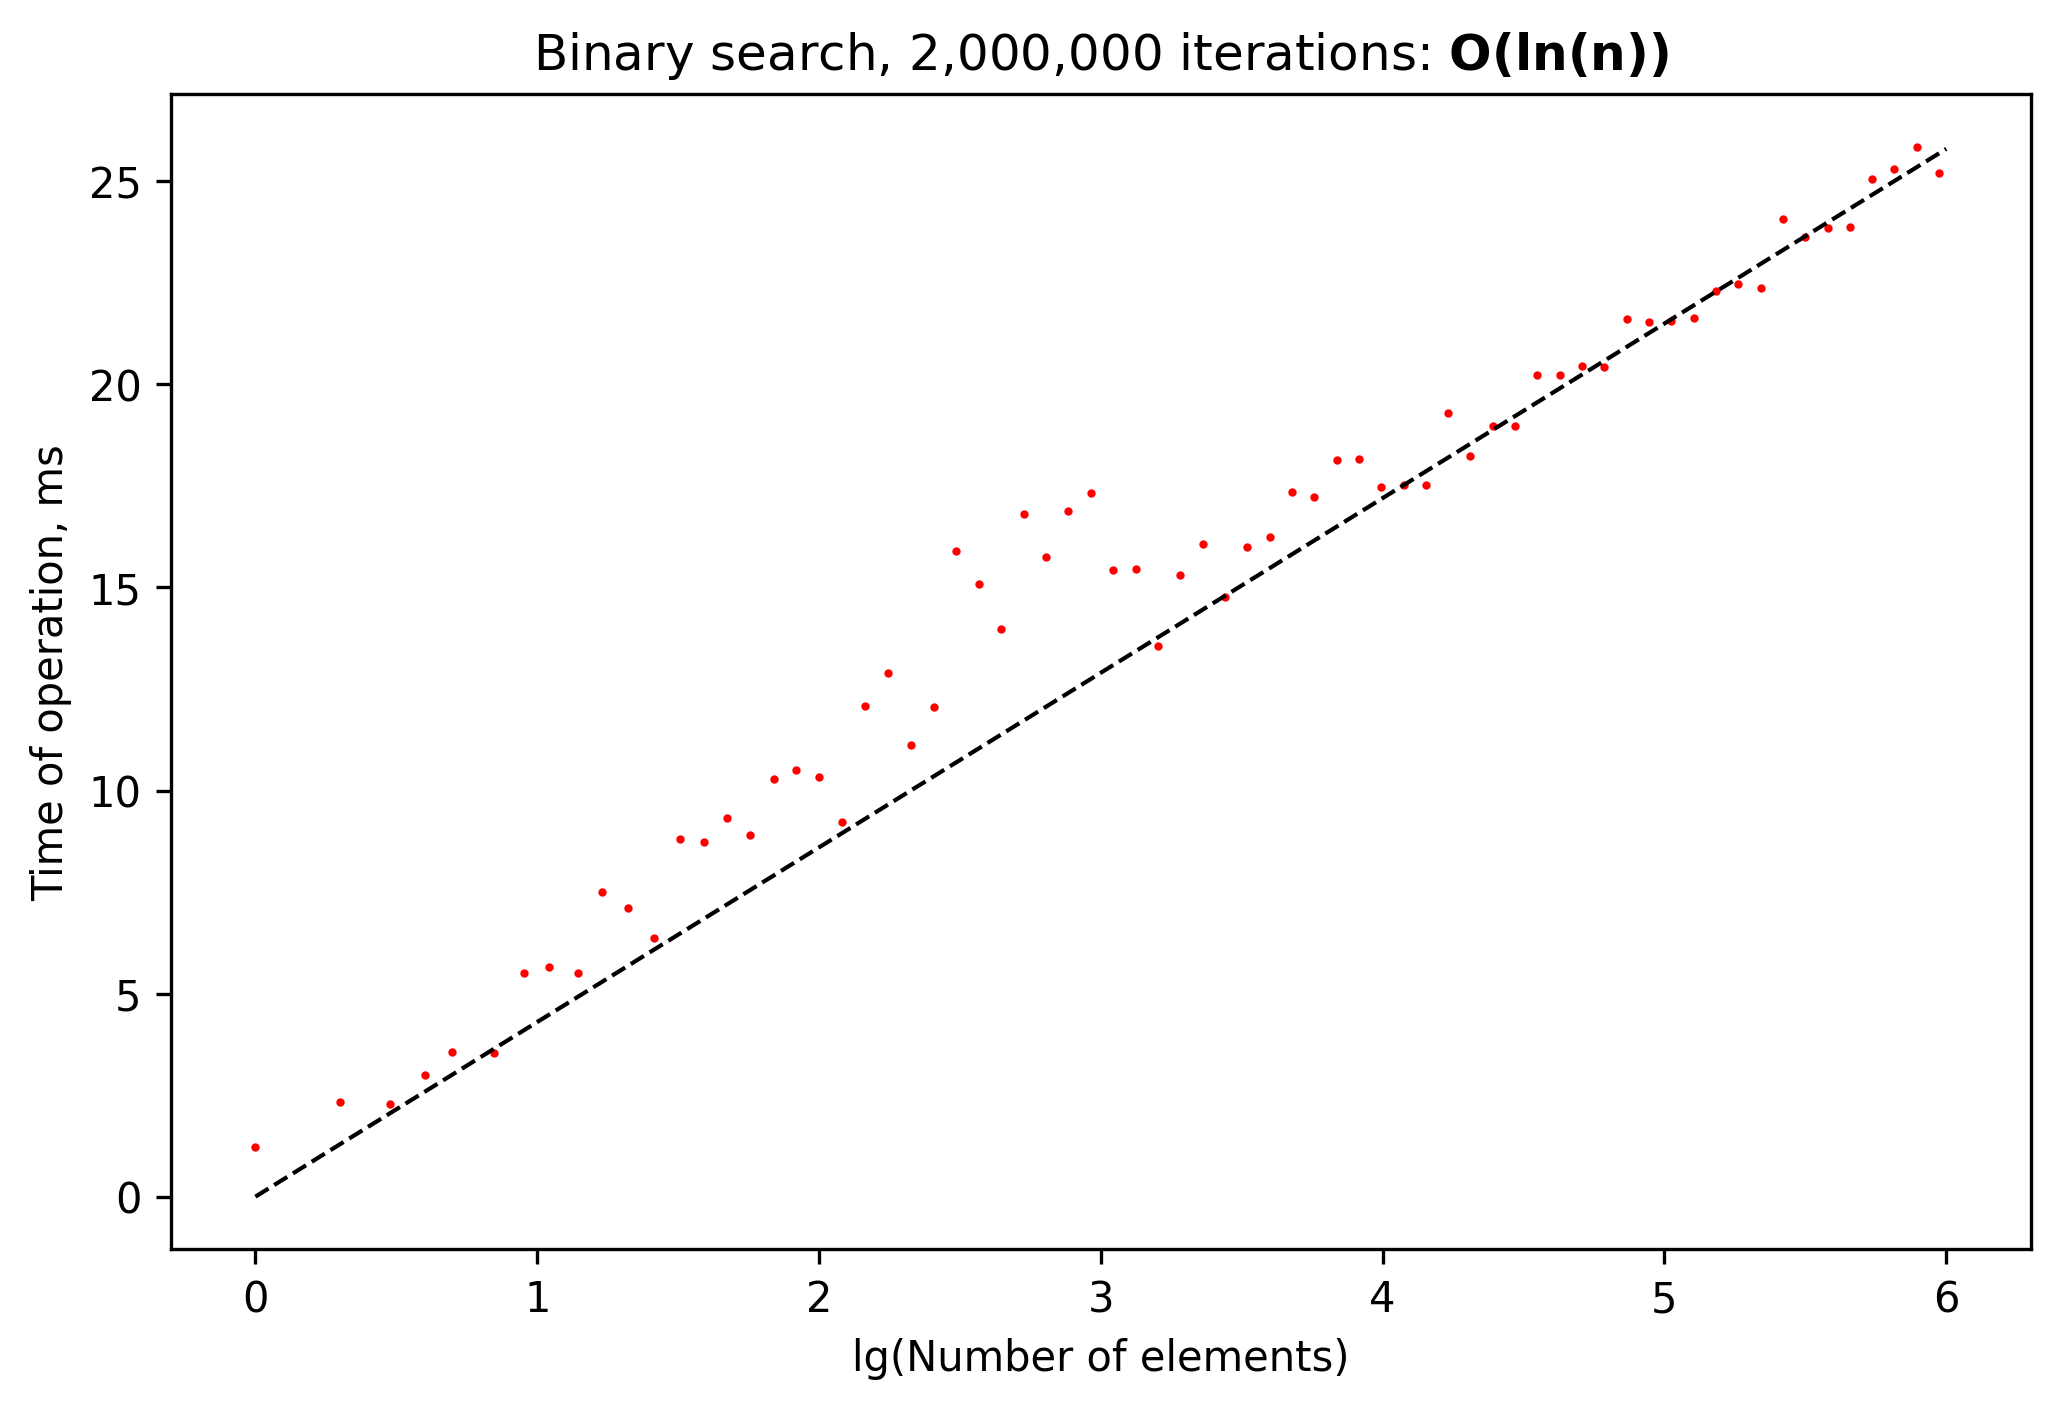

In [54]:
ls = np.linspace(0, 6, 100)
plt.xlabel(r'lg(Number of elements)')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['lnsize'], df['time']/1000, 'or', ms=1)
plt.title("Binary search, 2,000,000 iterations: $\mathbf{O(ln(n))}$")
k=4.3
plt.plot(ls, k*ls, '--k', lw=1)

# Sum of two

In [157]:
df = pd.read_csv("sumtwo/sumtwo.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:5].median(), axis=1)

In [158]:
df= df[df.time!=0.0]
df['lnsize'] = df.apply(lambda x: log10(x['size']), axis=1)
df['lntime'] = df.apply(lambda x: log10(x['time']), axis=1)

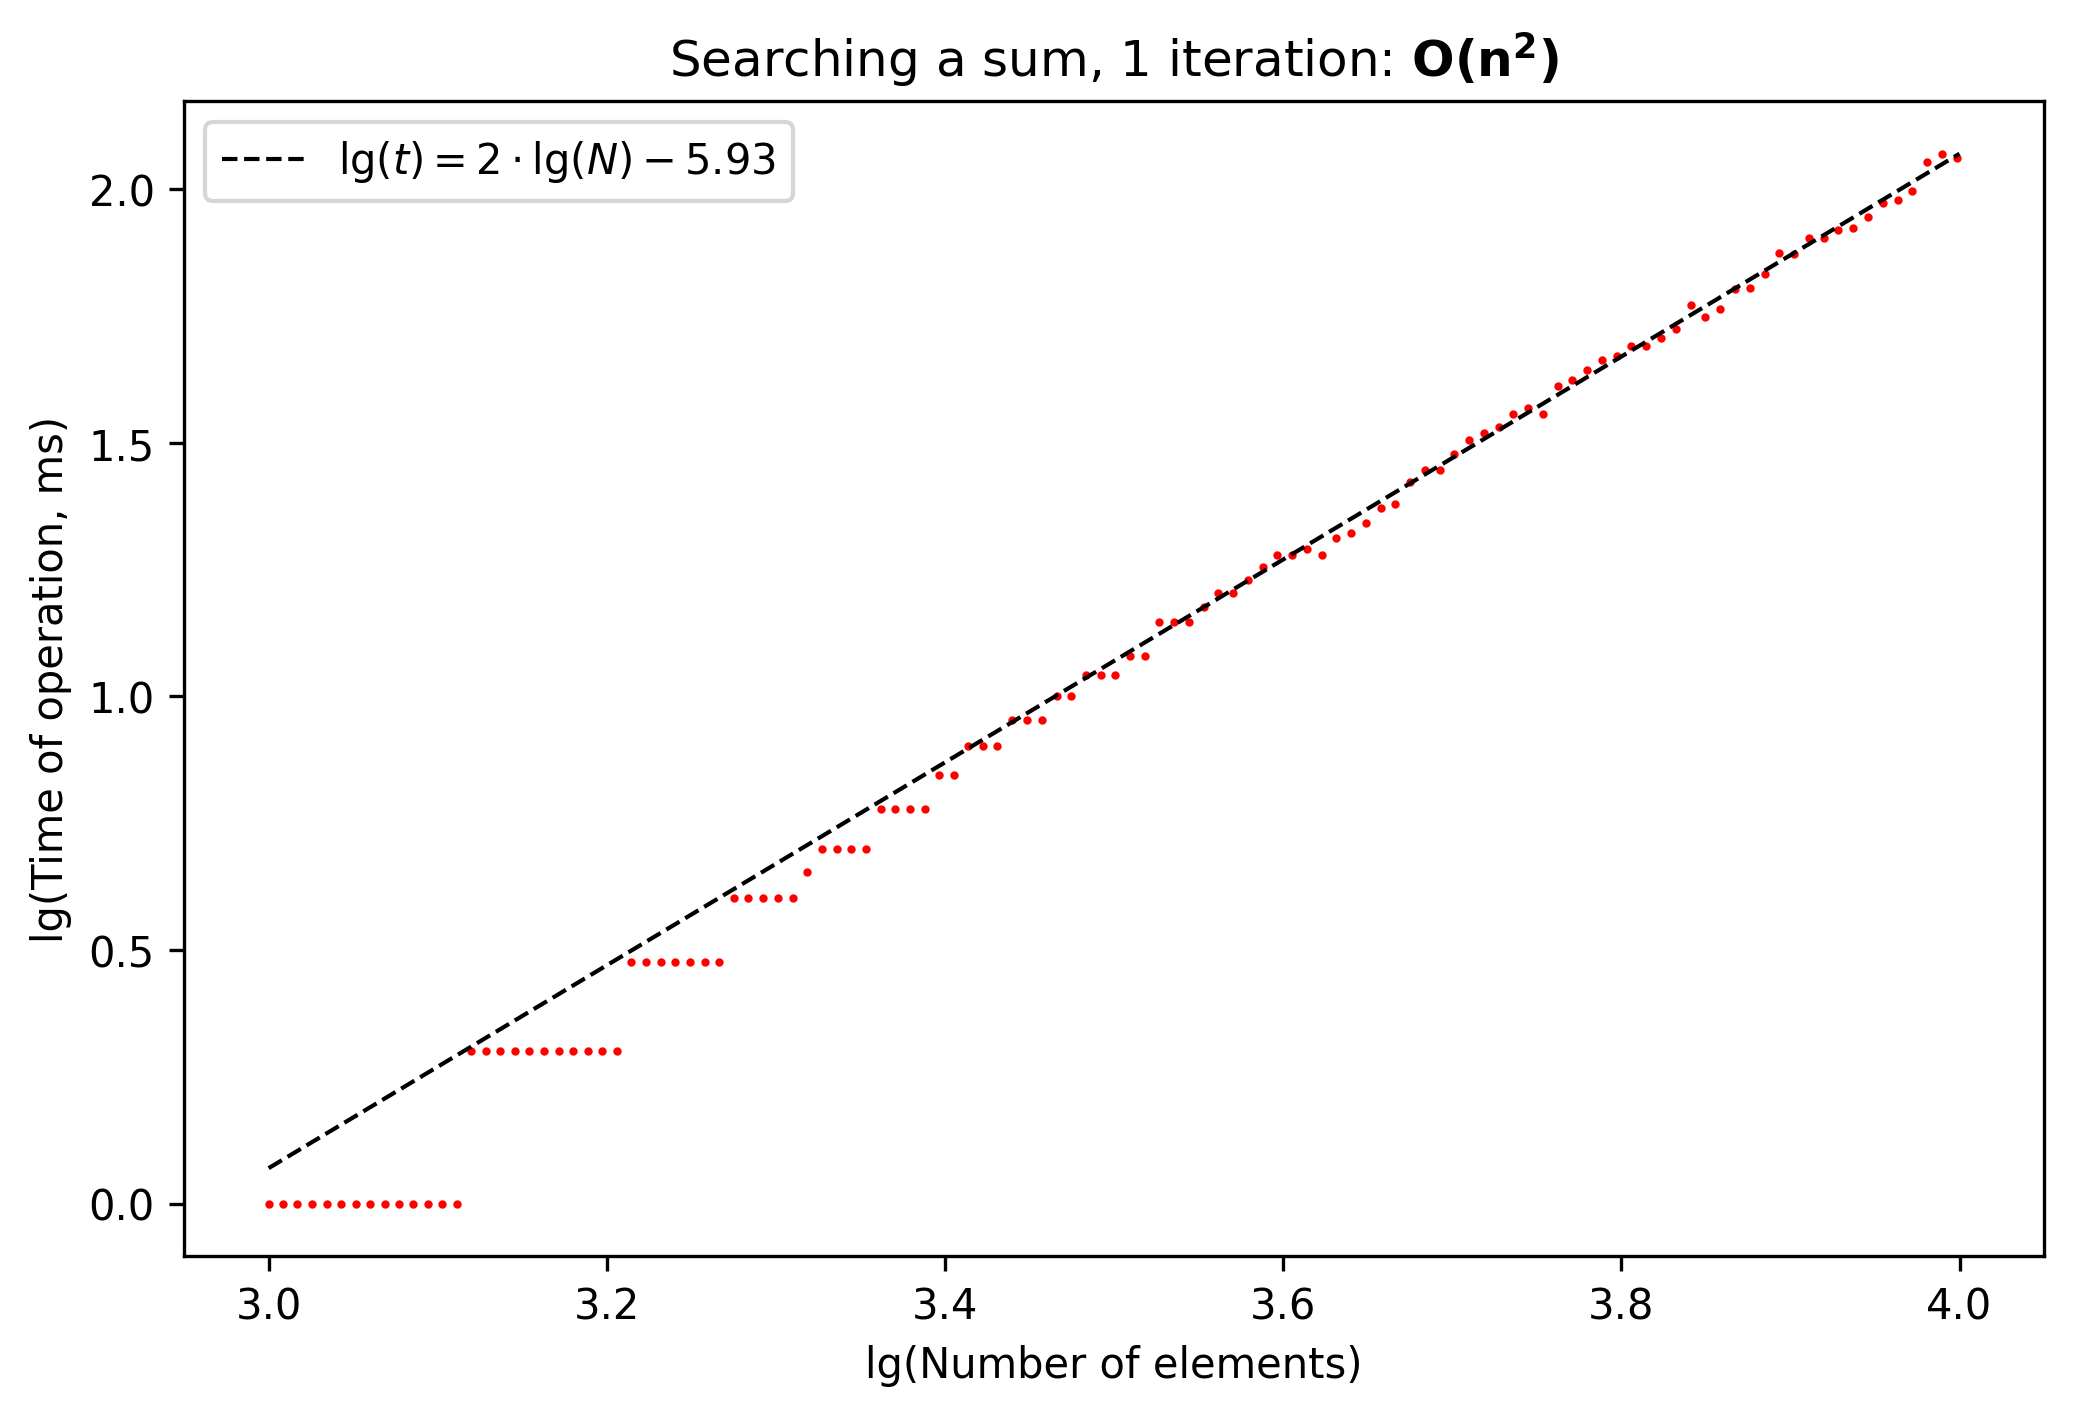

In [159]:
ls = np.linspace(3, 4, 100)
plt.xlabel(r'lg(Number of elements)')
plt.ylabel(r'lg(Time of operation, ms)')
plt.plot(df['lnsize'], df['lntime'], 'or', ms=1)
plt.title("Searching a sum, 1 iteration: $\mathbf{O(n^2)}$")
k=2
b=-5.93
plt.plot(ls, k*ls+b, '--k', lw=1, label = r'$\lg(t) = 2\cdot \lg(N) - 5.93$')
plt.legend()

# Sum of two [SORTED]

In [165]:
df = pd.read_csv("sumtwo-sorted/sumtwo-sorted.csv", delimiter = ';')
df['time'] = df.apply(lambda x: x[1:5].median(), axis=1)

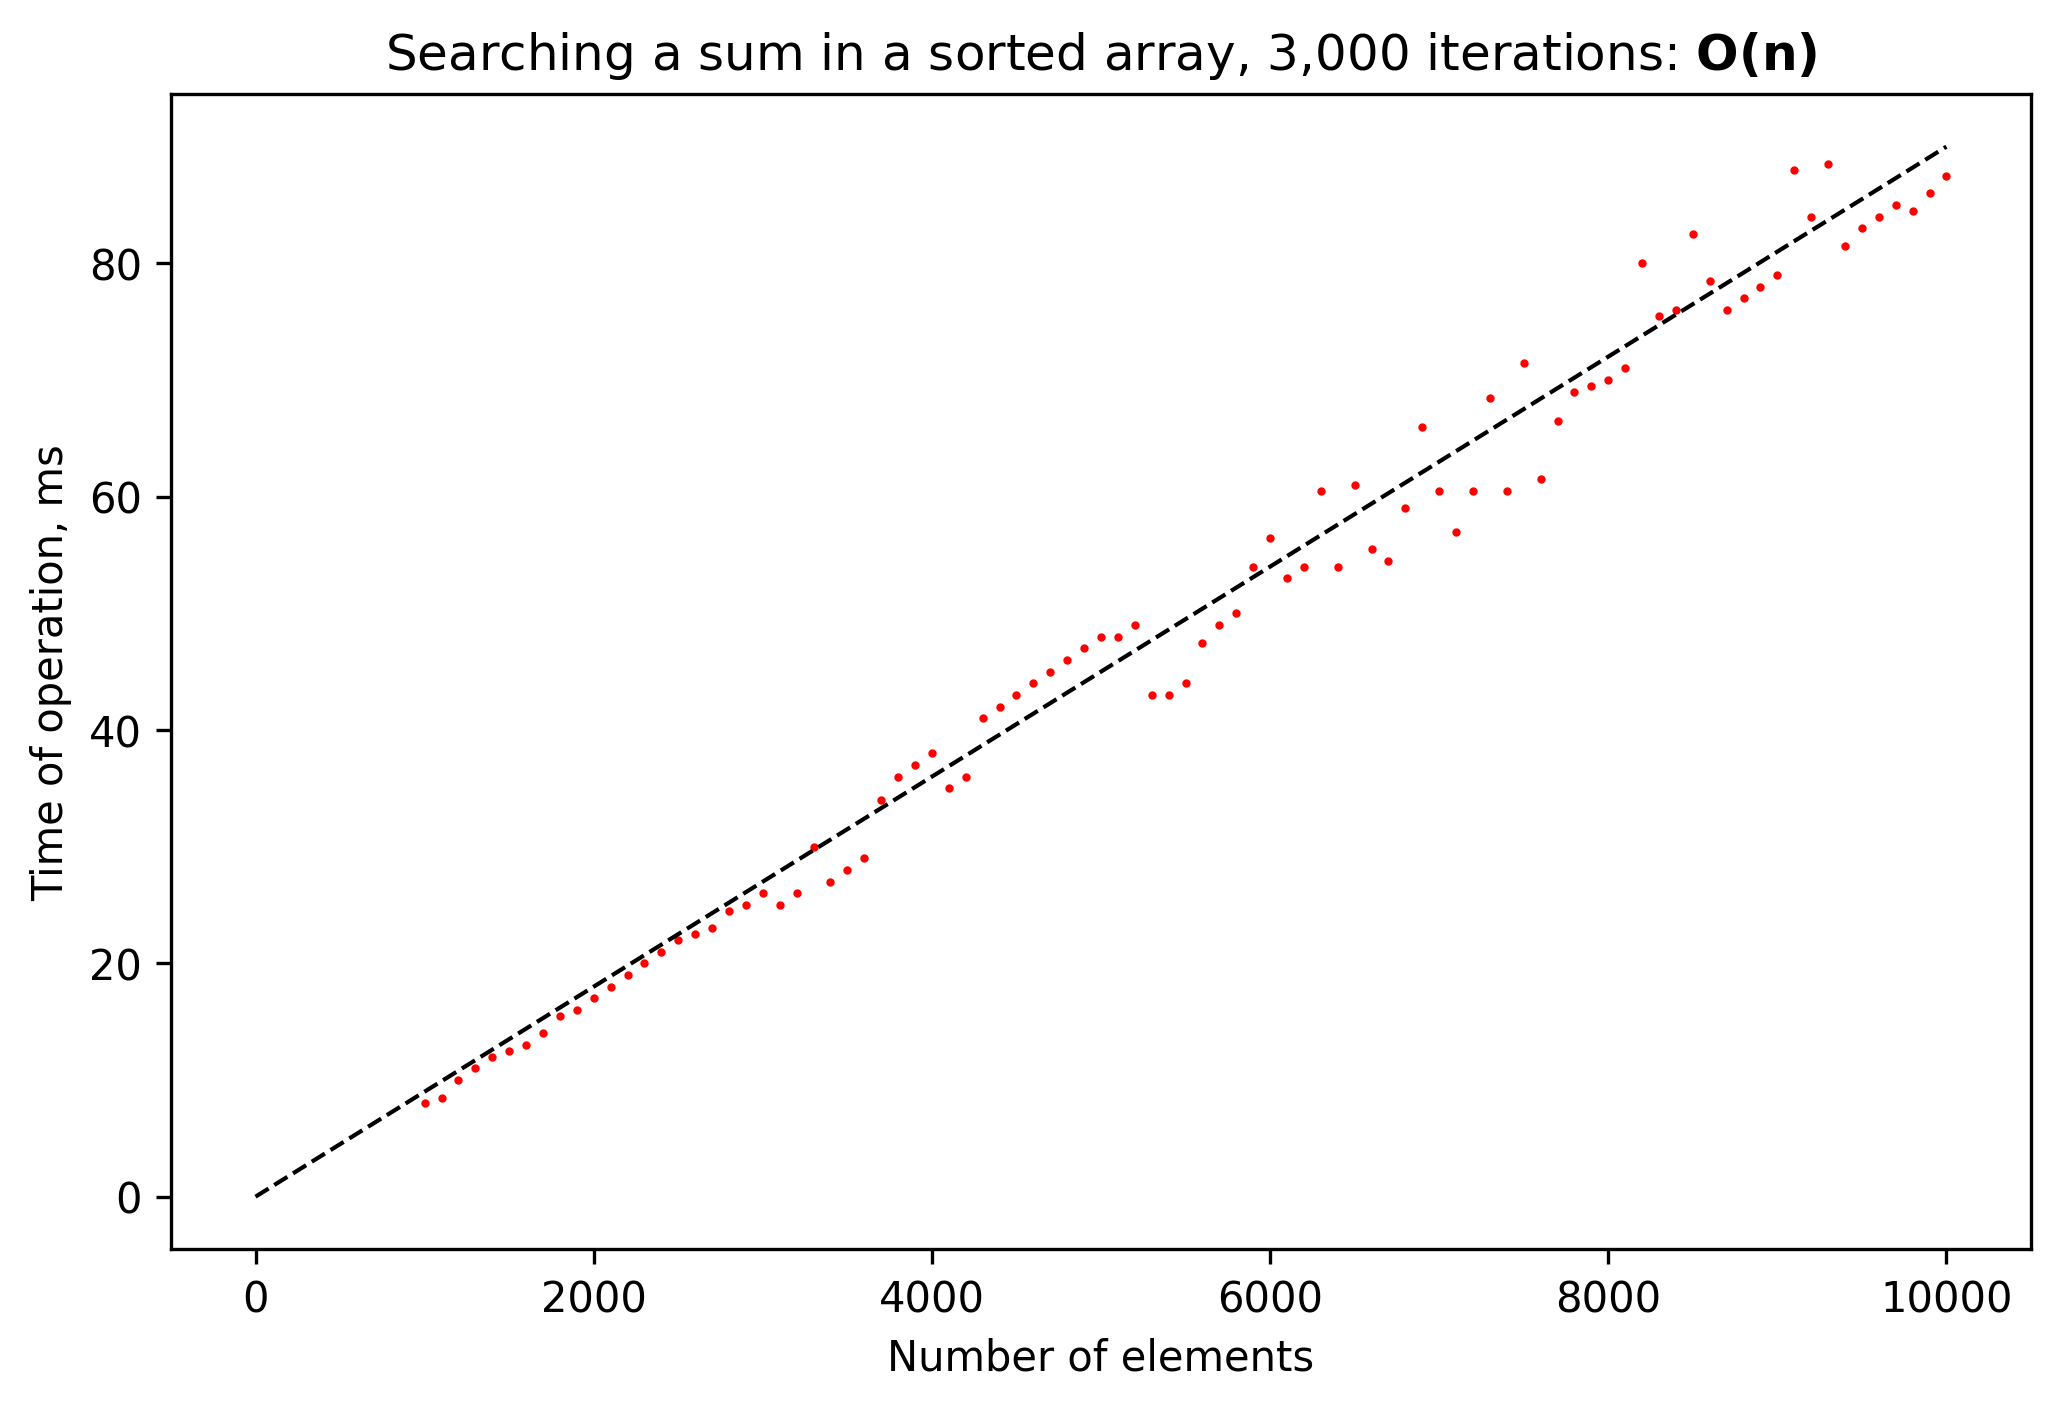

In [172]:
ls = np.linspace(0, 10000, 100)
plt.xlabel(r'Number of elements')
plt.ylabel(r'Time of operation, ms')
plt.plot(df['size'], df['time'], 'or', ms=1)
plt.title("Searching a sum in a sorted array, 3,000 iterations: $\mathbf{O(n)}$")
k=9.0e-3
plt.plot(ls, k*ls, '--k', lw=1)